In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

In [2]:
#Import csv
raw_game_data = pd.read_csv("vgsales-12-4-2019.csv")
raw_game_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [3]:
#Filter columns to only ones we need for analysis
base_game_df = raw_game_data.loc[:, ["Name", "Genre", "Platform", "Critic_Score", "Global_Sales", "NA_Sales",
                                     "PAL_Sales", "JP_Sales", "Other_Sales", "Year"]]

#Rename columns
base_game_df = base_game_df.rename(columns={"Critic_Score": "Critic Score", "Global_Sales": "Global Sales", "NA_Sales": "NA Sales",
                                           "PAL_Sales": "PAL Sales", "JP_Sales": "JP Sales", "Other_Sales": "Other Sales"})

base_game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
0,Wii Sports,Sports,Wii,7.7,NaN,NaN,NaN,NaN,NaN,2006.0
1,Super Mario Bros.,Platform,NES,10.0,NaN,NaN,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,Racing,Wii,8.2,NaN,NaN,NaN,NaN,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,Lost Ember,Adventure,XOne,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [4]:
#Filter Year to 2009-2019
game_df = base_game_df[base_game_df["Year"] >= 2009]
game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,NaN,2009.0
8,New Super Mario Bros. Wii,Platform,Wii,8.6,NaN,NaN,NaN,NaN,NaN,2009.0
9,Minecraft,Misc,PC,10.0,NaN,NaN,NaN,NaN,NaN,2010.0
12,Kinect Adventures!,Party,X360,6.7,NaN,NaN,NaN,NaN,NaN,2010.0
...,...,...,...,...,...,...,...,...,...,...
55786,In the Valley of Gods,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [5]:
game_df.count()

Name            24744
Genre           24744
Platform        24744
Critic Score     2943
Global Sales     9099
NA Sales         5515
PAL Sales        5325
JP Sales         3986
Other Sales      6755
Year            24744
dtype: int64

In [6]:
platform_critic_df = game_df.dropna(subset=['Critic Score'])
# platform_critic_df.count()
platform_critic_global_df = platform_critic_df.dropna(subset=['Global Sales'])
platform_critic_global_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
19,Grand Theft Auto V,Action,PS3,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
20,Grand Theft Auto V,Action,PS4,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
40,Call of Duty: Modern Warfare 3,Shooter,X360,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
41,Call of Duty: Black Ops,Shooter,X360,8.8,14.74,9.76,3.73,0.11,1.14,2010.0
45,Red Dead Redemption 2,Action-Adventure,PS4,9.8,13.94,5.26,6.21,0.21,2.26,2018.0
...,...,...,...,...,...,...,...,...,...,...
21064,Resident Evil 5: Gold Edition,Action,PS3,9.1,0.00,NaN,0.00,NaN,0.00,2010.0
21068,Gone Home,Adventure,PC,9.1,0.00,NaN,0.00,NaN,0.00,2013.0
21204,X-Blades,Action,PC,6.4,0.00,NaN,0.00,NaN,NaN,2009.0
21233,Elebits: The Adventures of Kai and Zero,Action,DS,7.4,0.00,0.00,NaN,NaN,NaN,2009.0


In [7]:
platform_critic_global_df = platform_critic_global_df.groupby(by=['Platform']).agg({'Critic Score': 'mean', 'Global Sales': 'sum'})
platform_critic_global_df = platform_critic_global_df.reset_index()
platform_critic_global_df = platform_critic_global_df.sort_values('Global Sales', ascending=False)
platform_critic_global_df

,Platform,Critic Score,Global Sales
5,PS3,7.365352,455.96
12,X360,7.173596,417.15
6,PS4,7.735714,234.40
10,Wii,6.831183,126.84
14,XOne,7.818519,85.77
3,PC,7.505914,68.09
0,3DS,6.874834,55.25
1,DS,6.954622,52.48
8,PSP,6.856140,38.78
2,NS,7.508000,38.40


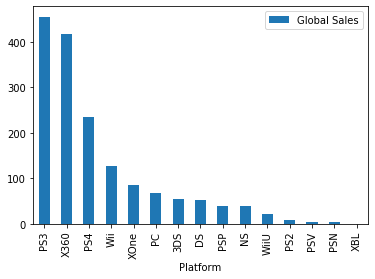

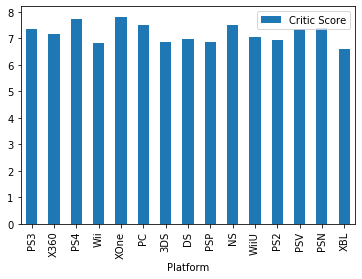

In [8]:
platform_critic_global_df.plot(kind='bar',x='Platform',y='Global Sales')
platform_critic_global_df.plot(kind='bar',x='Platform',y='Critic Score')

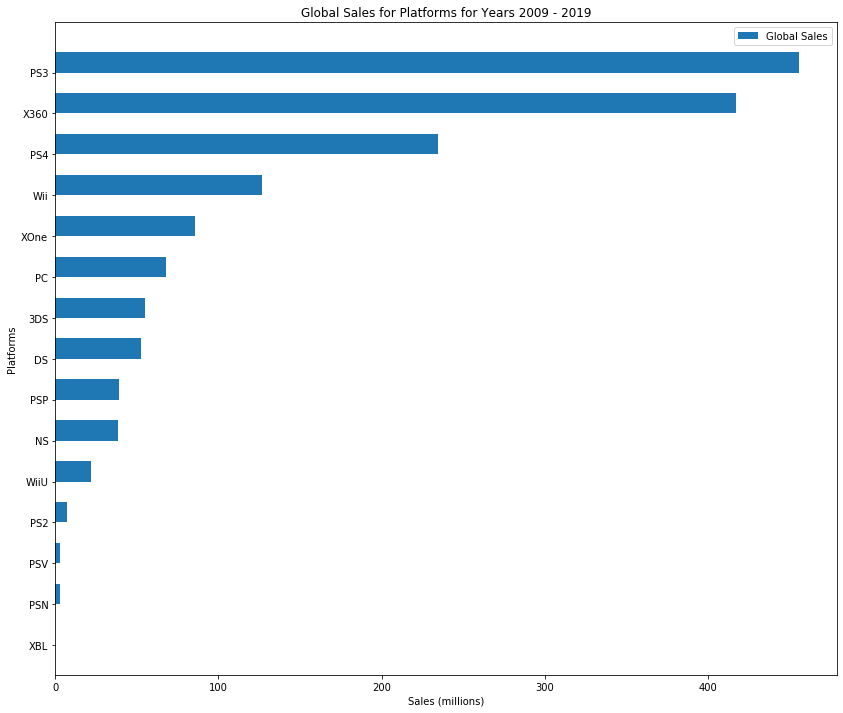

In [9]:
fig, ax = plt.subplots(figsize=(14, 12))
num_platforms = len(platform_critic_global_df["Platform"])
ind = np.arange(num_platforms)
width = 0.50
p1 = ax.barh(ind, platform_critic_global_df["Global Sales"], width)
# p2 = ax.bar(ind + width, platform_critic_global_df["Critic Score"], width)
ax.set_title('Global Sales for Platforms for Years 2009 - 2019')
ax.set_ylabel('Platforms')
ax.set_xlabel('Sales (millions)')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(platform_critic_global_df["Platform"], rotation='horizontal')
ax.invert_yaxis()
plt.legend(['Global Sales'], loc='upper right')
# plt.grid()
plt.autoscale()
plt.savefig("Platform_Global_Sales.png", pad_inches=0.1)
plt.show()

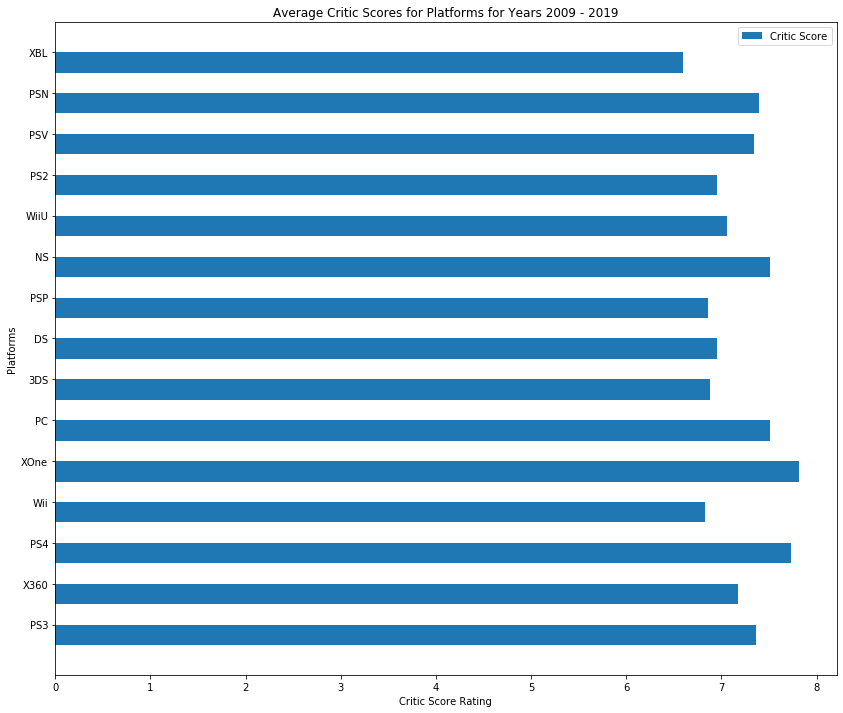

In [10]:
fig, ax = plt.subplots(figsize=(14, 12))
num_platforms = len(platform_critic_global_df["Platform"])
ind = np.arange(num_platforms)
width = 0.50
p1 = ax.barh(ind, platform_critic_global_df["Critic Score"], width)
ax.set_title('Average Critic Scores for Platforms for Years 2009 - 2019')
ax.set_ylabel('Platforms')
ax.set_xlabel('Critic Score Rating')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(platform_critic_global_df["Platform"], rotation='horizontal')
# ax.invert_yaxis()
plt.legend(['Critic Score'], loc='upper right')
# plt.grid()
plt.autoscale()
plt.savefig("Platform_Critic_Score.png", pad_inches=0.1)
plt.show()

In [11]:
platform_df = game_df.dropna(subset=['Global Sales'])

platform_sales_df = platform_df.groupby(by=['Platform']).agg({'Global Sales' : 'sum'})
platform_sales_df = platform_sales_df.reset_index()
platform_sales_df


,Platform,Global Sales
0,3DS,116.67
1,DS,195.29
2,GBA,0.72
3,Mob,0.08
4,NS,49.88
5,OSX,0.03
6,PC,113.74
7,PS2,38.11
8,PS3,703.32
9,PS4,585.09


In [12]:
platform_genre_df = platform_df.groupby(by=['Platform','Genre']).agg({'Global Sales' : 'sum'})
platform_genre_df = platform_genre_df.reset_index()
platform_genre_df
# platform_genre_df.plot(kind='bar',x='Platform',y='Global Sales')

,Platform,Genre,Global Sales
0,3DS,Action,16.91
1,3DS,Action-Adventure,7.52
2,3DS,Adventure,6.98
3,3DS,Education,0.09
4,3DS,Fighting,2.67
...,...,...,...
222,XOne,Shooter,93.94
223,XOne,Simulation,3.48
224,XOne,Sports,48.80
225,XOne,Strategy,1.08


In [13]:
sorted_platform_sales_df = platform_sales_df.sort_values('Global Sales', ascending=False)
sorted_platform_sales_df = sorted_platform_sales_df.reset_index()
# sorted_platform_sales_df = sorted_platform_sales_df.drop(columns=['index'])
sorted_platform_sales_df
# based on analysis we will be pulling PS3, X360, Wii, DS, PC.  

,index,Platform,Global Sales
0,8,PS3,703.32
1,18,X360,640.28
2,9,PS4,585.09
3,16,Wii,298.38
4,20,XOne,278.56
5,1,DS,195.29
6,0,3DS,116.67
7,6,PC,113.74
8,11,PSP,96.20
9,12,PSV,65.37


In [14]:
# sorted_platform_genre_df = platform_genre_df.sort_values('Global Sales', ascending=False)
# sorted_platform_genre_df = sorted_platform_genre_df.reset_index()
# sorted_platform_genre_df = sorted_platform_genre_df.drop(columns=['index'])
# sorted_platform_genre_df

In [15]:
# PS3, X360, Wii, DS, PC.  
pp1_df = platform_genre_df.loc[platform_genre_df['Platform'] == 'PS3']
pp2_df = platform_genre_df.loc[platform_genre_df['Platform'] == 'X360']
pp3_df = platform_genre_df.loc[platform_genre_df['Platform'] == 'Wii']
pp4_df = platform_genre_df.loc[platform_genre_df['Platform'] == 'DS']
pp5_df = platform_genre_df.loc[platform_genre_df['Platform'] == 'PC']
top_platform_df = pd.concat([pp1_df,pp2_df,pp3_df,pp4_df,pp5_df])
top_platform_df = top_platform_df.groupby(by=['Genre','Platform']).agg({'Global Sales' : 'sum'})
top_platform_df = top_platform_df.reset_index()
platform_top_df = top_platform_df.pivot_table(index="Genre", columns="Platform", values="Global Sales")
platform_top_df = platform_top_df.reset_index()
platform_top_df

Platform,Genre,DS,PC,PS3,Wii,X360
0,Action,31.79,7.51,167.26,36.89,119.89
1,Action-Adventure,0.94,2.79,32.23,2.89,25.27
2,Adventure,28.97,2.25,22.04,18.16,15.47
3,Fighting,2.26,0.37,39.09,4.01,29.41
4,MMO,NaN,3.15,1.42,0.97,NaN
5,Misc,29.72,2.15,46.68,86.55,37.20
6,Music,NaN,0.70,3.81,18.18,9.40
7,Party,NaN,NaN,0.04,0.40,0.22
8,Platform,8.10,0.40,17.04,11.64,7.69
9,Puzzle,20.73,0.76,1.79,5.99,1.19


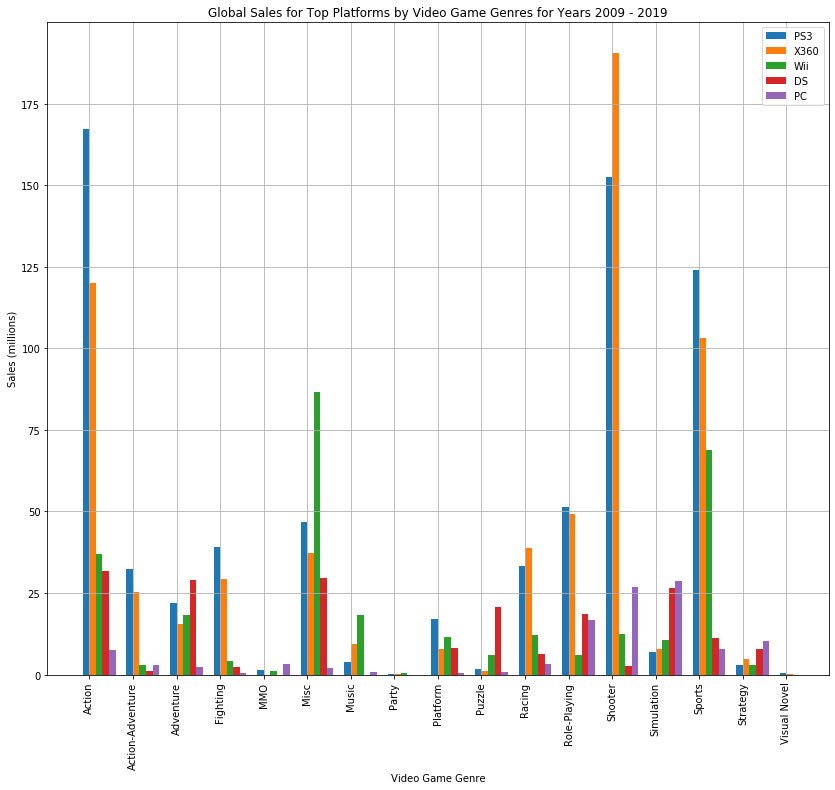

In [16]:
fig, ax = plt.subplots(figsize=(14, 12))
num_genres = len(platform_top_df["Genre"])
ind = np.arange(num_genres)
width = 0.15
p1 = ax.bar(ind, platform_top_df["PS3"], width)
p2 = ax.bar(ind + width, platform_top_df["X360"], width)
p3 = ax.bar(ind + width*2, platform_top_df["Wii"], width)
p4 = ax.bar(ind + width*3, platform_top_df["DS"], width)
p5 = ax.bar(ind + width*4, platform_top_df["PC"], width)
ax.set_title('Global Sales for Top Platforms by Video Game Genres for Years 2009 - 2019')
ax.set_ylabel('Sales (millions)')
ax.set_xlabel('Video Game Genre')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(platform_top_df["Genre"], rotation='vertical')
plt.legend(['PS3', 'X360', 'Wii', 'DS', 'PC'], loc='upper right')
plt.grid()
plt.autoscale()
plt.savefig("Vertical_Top_Platforms_Global_Sales.png", pad_inches=0.1)
plt.show()

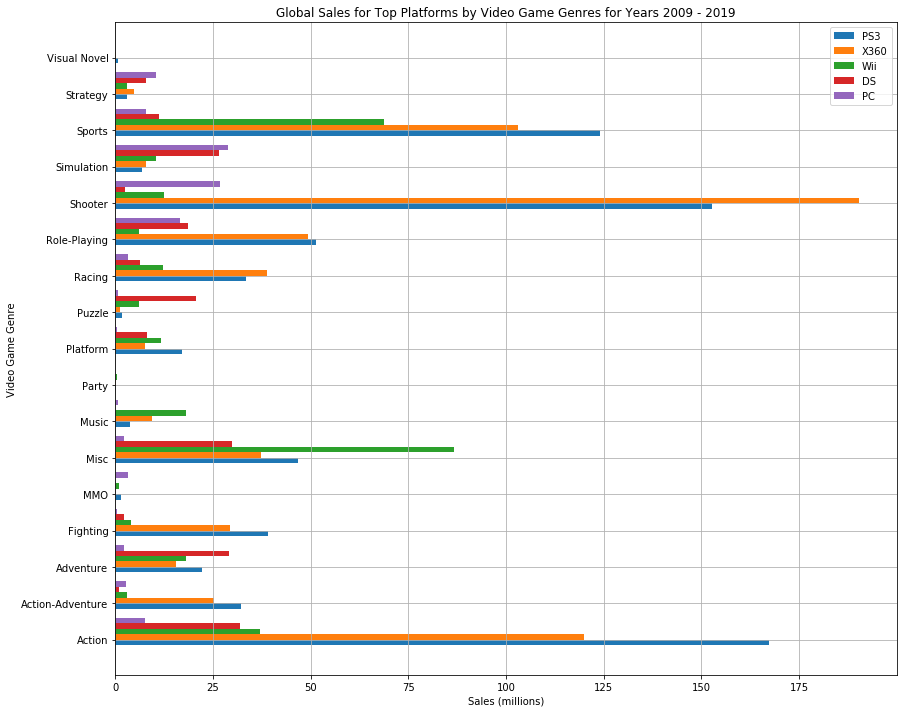

In [17]:
fig, ax = plt.subplots(figsize=(14, 12))
num_genres = len(platform_top_df["Genre"])
ind = np.arange(num_genres)
width = 0.15
p1 = ax.barh(ind, platform_top_df["PS3"], width)
p2 = ax.barh(ind + width, platform_top_df["X360"], width)
p3 = ax.barh(ind + width*2, platform_top_df["Wii"], width)
p4 = ax.barh(ind + width*3, platform_top_df["DS"], width)
p5 = ax.barh(ind + width*4, platform_top_df["PC"], width)
ax.set_title('Global Sales for Top Platforms by Video Game Genres for Years 2009 - 2019')
ax.set_ylabel('Video Game Genre')
ax.set_xlabel('Sales (millions)')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(platform_top_df["Genre"],)
plt.legend(['PS3', 'X360', 'Wii', 'DS', 'PC'], loc='upper right')
plt.grid()
plt.autoscale()
plt.savefig("Top_Platform_Global_Sales.png", pad_inches=0.1)
plt.show()